## **TAREA 1 - VISIÓN DE MÁQUINA**

**Universidad Nacional de Colombia** <br>
**Maestría en Ingeniería - Automatización industrial**

Juan Sebastián Hernandez Reyes; Julián Felipe Molina Grisales


### 1.   Estudiar e implementar las principales técnicas de interpolación

---

---








In [ ]:
from google.colab import drive 
drive.mount('/content/drive') #Comando para montar carpeta de drive en Google Colab

Mounted at /content/drive


Tamaño de la imagen: (512, 512)




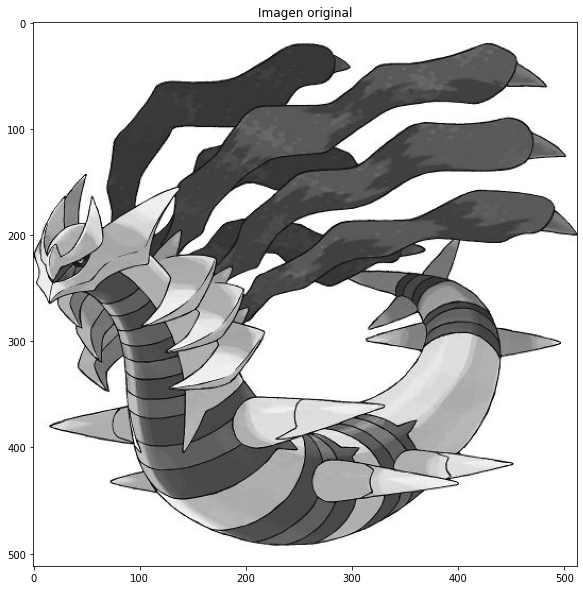

In [ ]:
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/Vision_Maquina/Tarea1/giratina.jpg',0) #Se carga imagen en grises
N, M = img.shape[:2]               #Tamaño de la imagen
print("Tamaño de la imagen: ({}, {})".format(N,M))
print('\n')

plt.figure(figsize=(10,10))
plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen original')
plt.show()



*   Interpolación por vecino más cercano: En este metodo se asigna al nuevo pixel la intensidad del vecino más cercano de la imagen original.




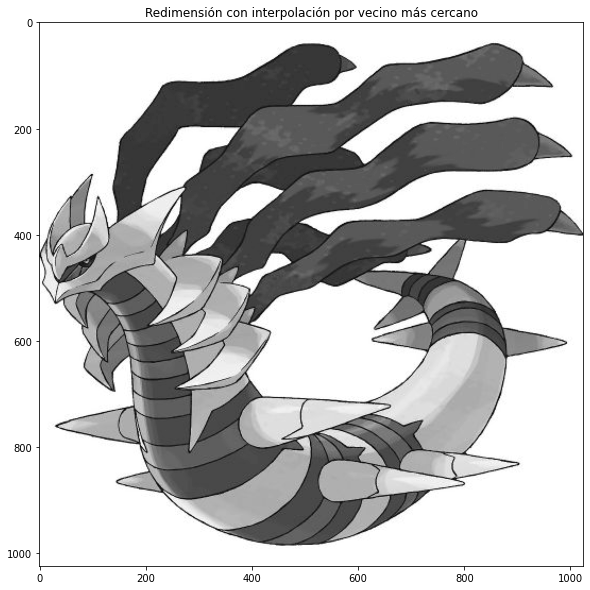

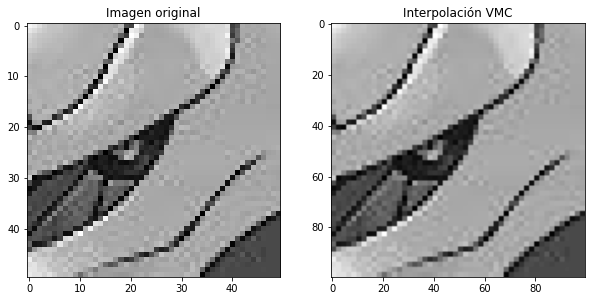

In [ ]:
#VECINO MÁS CERCANO

img_nn = cv2.resize(img, (1024,1024), 0, 0, interpolation = cv2.INTER_NEAREST) #Uso de la funcion resize de OpenCV para redimensión
plt.figure(figsize=(10,10))
plt.imshow(img_nn, cmap=plt.cm.gray), plt.title('Redimensión con interpolación por vecino más cercano')
plt.show()

print('\n')

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img[200:250,25:75], cmap=plt.cm.gray), plt.title('Imagen original')
plt.subplot(122),plt.imshow(img_nn[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación VMC')
plt.show()



*   Interpolación bilineal: Se usan los cuatro vecinos más cercanos y se calcula la intensidad del nuevo pixel con la ecuación:

  $f(x,y) = a x + b y + c x y + d$

    Donde los cuatro coeficientes se calculan de las cuatro ecuaciones que se establecen con los 4 vecinos del punto $(x,y)$


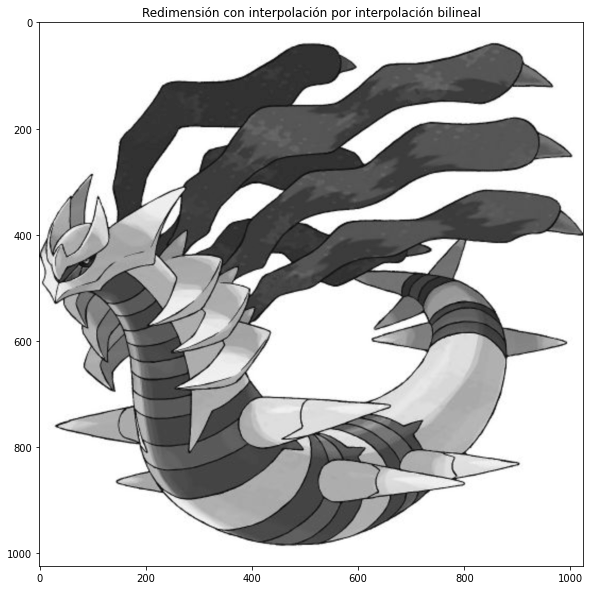

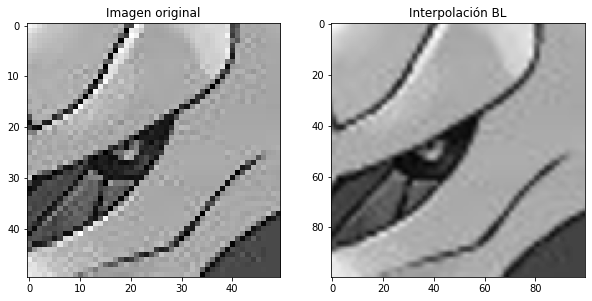

In [ ]:
#BILINEAL
img_bl = cv2.resize(img, (1024,1024), 0, 0, interpolation = cv2.INTER_LINEAR) #Uso de la funcion resize de OpenCV para redimensión
plt.figure(figsize=(10,10))
plt.imshow(img_bl, cmap=plt.cm.gray), plt.title('Redimensión con interpolación por interpolación bilineal')
plt.show()

print('\n')

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img[200:250,25:75], cmap=plt.cm.gray), plt.title('Imagen original')
plt.subplot(122),plt.imshow(img_bl[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación BL')
plt.show()



*   Interpolación bicubica: En esta interpolación se extiende el cálculo de la intensidad a los 6 vecinos más cercanos a través de la ecuación:

  $f(x,y) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j $

    Donde de nuevo los 6 coeficientes se calcularán a partir de las 6 ecuaciones que se establecen con los 6 vecinos del punto $(x,y)$



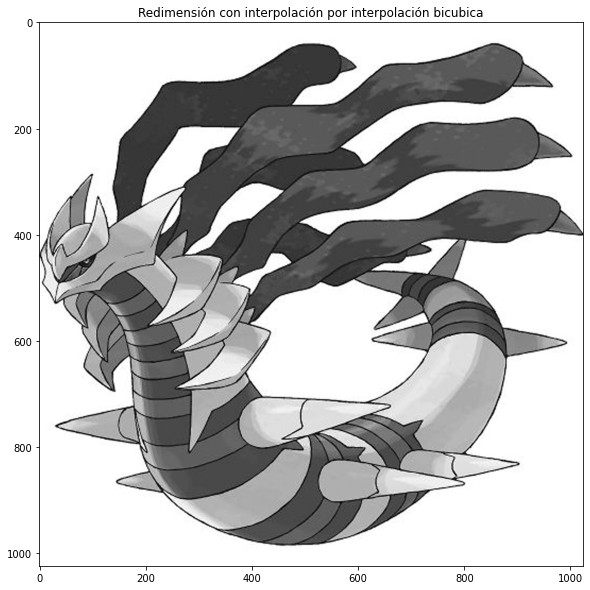

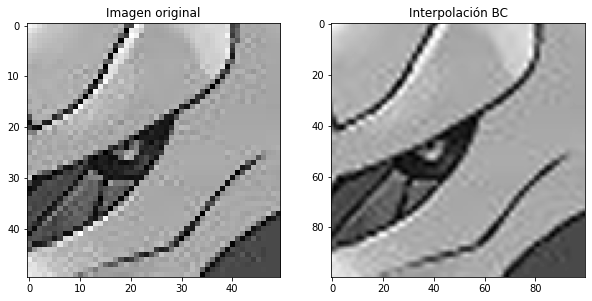

In [ ]:
#BICUBICA
img_bc = cv2.resize(img, (1024,1024), 0, 0, interpolation = cv2.INTER_CUBIC) #Uso de la funcion resize de OpenCV para redimensión
plt.figure(figsize=(10,10))
plt.imshow(img_bc, cmap=plt.cm.gray), plt.title('Redimensión con interpolación por interpolación bicubica')
plt.show()

print('\n')

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img[200:250,25:75], cmap=plt.cm.gray), plt.title('Imagen original')
plt.subplot(122),plt.imshow(img_bc[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación BC')
plt.show()



*   Interpolación b-splines: Las splines son curvas polinomicas a trozos diferenciables hasta un orden prescrito. El método de curvas b-splines permite expresar una spline $s(u)$ como una combinación afín de ciertos puntos de control $\mathbf{c}_i$, esto es:

  $$s(u)=\sum \mathbf{c}_i N_i^n(u)$$

  Donde $N_i^n(u) son funciones polnómicas por trozos con soporte infinito

  Para la implementación se hace una interpolación tomando primero las filas de la imagen como si fueran una función base a x que es un vector ordenado de 0 hasta el tamaño horizontal de la imagen e interpolando los valores faltantes; luego se repite este proceso con las columnas para llegar a la imagen completa, se puede ver la referencia de las funciones usadas en:

  [Scipy Reference: Interpolate](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) 






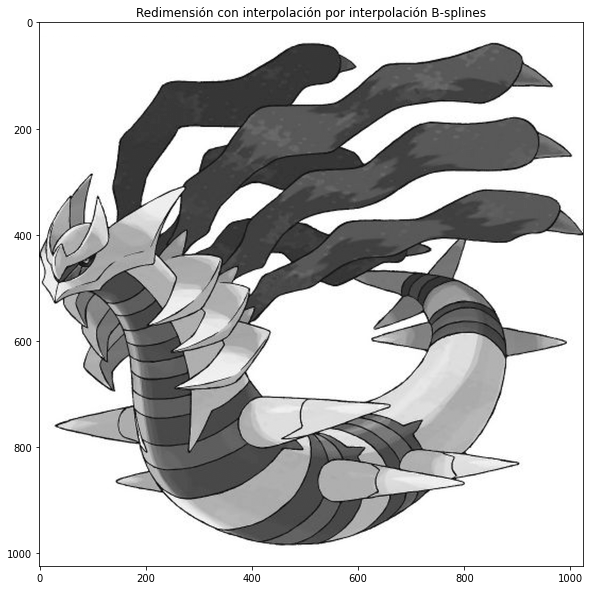

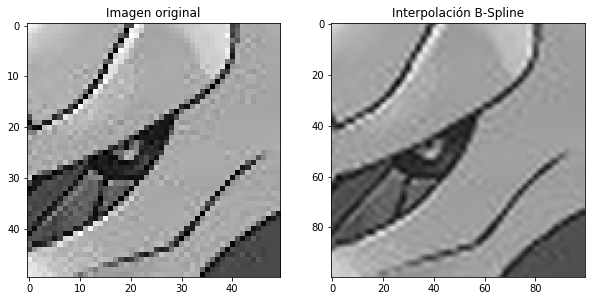

In [ ]:
#B-SPLINES
from scipy import interpolate
from google.colab.patches import cv2_imshow

x_n=np.arange(img.shape[0])
y_n=np.arange(img.shape[1])

xi=np.arange(img.shape[0]*2)/2
yi=np.arange(img.shape[1]*2)/2

img_bs=np.zeros((img.shape[0]*2,img.shape[1]*2))
img_bs_filas=np.zeros((img.shape[0],img.shape[1]*2))

for i in y_n:
  tck = interpolate.splrep(x_n, img[i,:])
  img_bs_filas[i,:]= interpolate.splev(xi,tck)

for j in range(img.shape[0]*2):
  tck = interpolate.splrep(y_n, img_bs_filas[:,j])
  img_bs[:,j]= interpolate.splev(yi,tck)

img_bs=img_bs.astype(int)

plt.figure(figsize=(10,10))
plt.imshow(img_bs, cmap="gray", vmin=0, vmax=255), plt.title('Redimensión con interpolación por interpolación B-splines')
plt.show()

print('\n')

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img[200:250,25:75], cmap=plt.cm.gray), plt.title('Imagen original')
plt.subplot(122),plt.imshow(img_bs[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación B-Spline')
plt.show()


### 2.   Evaluar el desempeño de las técnicas de interpolación implementadas

---

---



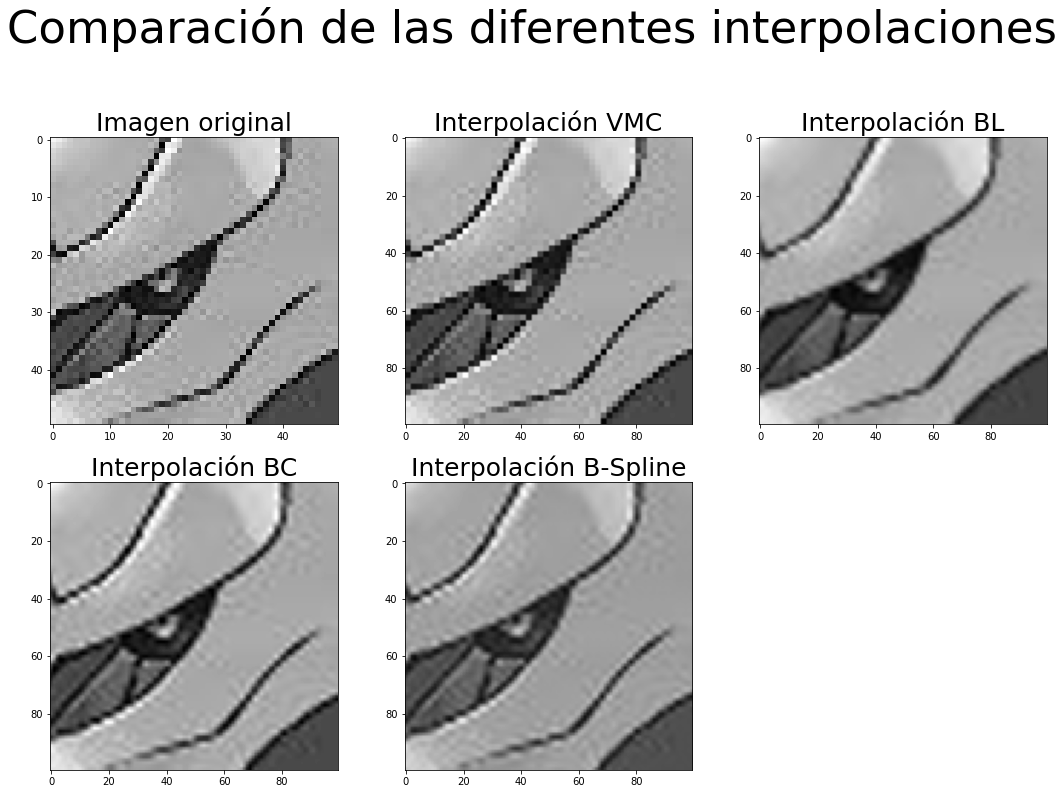

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(331),plt.imshow(img[200:250,25:75], cmap=plt.cm.gray), plt.title('Imagen original',fontsize=25)
plt.subplot(332),plt.imshow(img_nn[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación VMC',fontsize=25)
plt.subplot(333),plt.imshow(img_bl[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación BL',fontsize=25)
plt.subplot(334),plt.imshow(img_bc[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación BC',fontsize=25)
plt.subplot(335),plt.imshow(img_bs[400:500,50:150], cmap=plt.cm.gray), plt.title('Interpolación B-Spline',fontsize=25)
plt.suptitle("Comparación de las diferentes interpolaciones",fontsize=45)
plt.show()

Para evaluar el desempeño de las técnicas usadas se elige una región de alto detalle de la imagen y se comparan las 4 técnicas con la original. Se puede notar al realizar el zoom que en la imagen original se encuentra un alto grado de pixelado que se refleja en la *interpolación por vecino más cercano*, en la *interpolación bicubica* se suavizan estos detalles pero es notable que el mejor desempeño lo tienen la *interpolación bilineal* y *b-splines* puesto que las sombras y los bordes de la imagen son más claros y el pixelado no es tan alto como en el resto de resultados.

### 3.   Desarrollar una función para rotar imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada

---

---



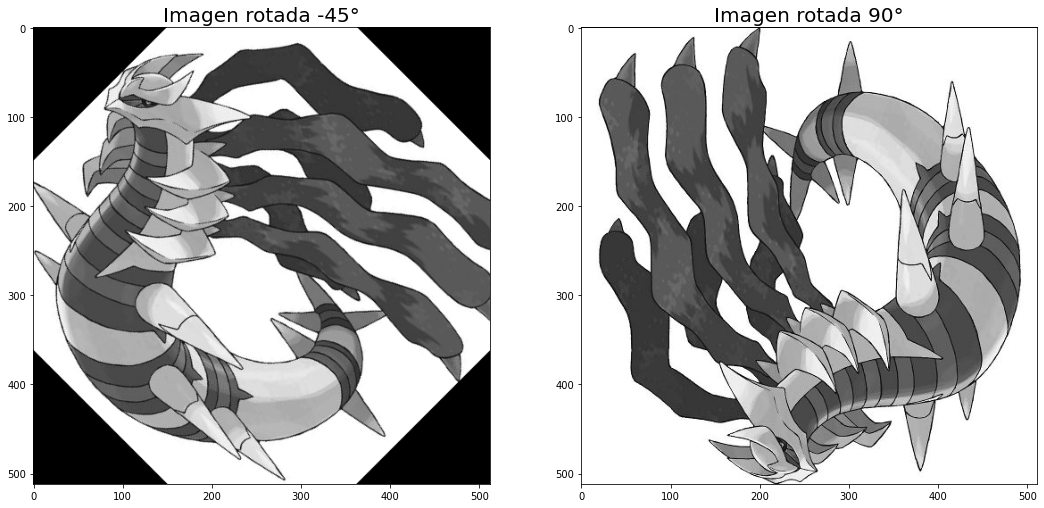

In [ ]:
def rotate(img, angle):
  N,M = img.shape[:2]
  T = cv2.getRotationMatrix2D((N//2, M//2), angle, 1.0) #Uso de la funcion getRotationMatrix de OpenCV para obtener matriz de transformación
  img_r = cv2.warpAffine(img, T, (M,N)) #Uso de la función warpAffine de OpenCV para aplicar la transformación a la imagen
  return img_r

img_r1 = rotate(img,-45)
img_r2 = rotate(img,90)

plt.figure(figsize=(18,18))
plt.subplot(121),plt.imshow(img_r1, cmap="gray", vmin=0, vmax=255), plt.title('Imagen rotada -45°', fontsize=20)
plt.subplot(122),plt.imshow(img_r2, cmap="gray", vmin=0, vmax=255), plt.title('Imagen rotada 90°', fontsize=20)
plt.show()

Para construir la función de rotación se usaron los metodos de OpenCV ``` getRotationMatrix2D()```, que permite generar la matriz de transformación en la forma 

  $T = \begin{bmatrix}\cos(\theta) & -\sin(\theta)\\\sin(\theta) & \cos(\theta)\end{bmatrix}$

donde $\theta$ es el angulo de rotación en grados, y ```warpAffine()``` que permite aplicar esta matriz a la imagen original para realizar la rotación. Se observa en las imagenes un resultado satisfactorio de esta función.